## Fraud detection with Logistic Regression vs Decision tree classifier

### About the Dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. `Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.`

You can read more about the data and the variables [here](https://www.kaggle.com/mlg-ulb/creditcardfraud).

Another resource for fraud detection methods: [here](https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/SimulatedDataset.html)

In [60]:
### required packages
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
# Reading data
credit = pd.read_csv("creditcard.csv")
print(credit.shape)
credit.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Instructions: 
Split the data 50-50 into train and test for the outcome/response and the predictor variables. 

In [62]:
X = credit.drop('Class', axis='columns')
y = credit.Class

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.5, random_state = 0) 

### Answer the following questions:

1 - Does `LogisticRegression` use a penalty by default?  If yes, what penalty? 

**answer:** Regularization is applied by default. The deafulat penalty is L2.

    
2 - If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients, relative to not applying a penalty during learning?
 
**answer:**  If it does the regulation by default the parameters are modified to provide the highest liklihood or smallest defined Loss. Applying the default penalty of L2 is equivalent to using Ridge regularization in which less influential independent variables will get very small coeficients and it decreases the variance of the model and avoids overfitting.
    
3 - If using the default settings of `LogisticRegression` in `sklearn`, should you include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**answer:** The defaul setting is (fit_intercept (bool), default=True : Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.) which means by default there is no need to include a column of 1s in the design matrix. 

### Instructions:

Create an instance of sklearn's `LogisticRegression` object for **unpenalized** logistic regression. (If you get a warning about convergence of `coef_`, try increasing the `max_iter` parameter.  I used `max_iter=10000` which seems to supress the warning.) Using this object, **run a logisitic regression analysis** of `Class` (y-variable) against `Amount` (x-variable) using your training data. Then make a plot with three main components based on the analysis:

1. Scatter-plot of `Amount` and `Outcome` on your test data

2. A curve showing the prediction (0 or 1, using `predict` - this curve will jump between 0 and 1) as a function of `Amount`

3. A curve showing the predicted probability of a positive outcome (using `predict_proba`) as a function of `Amount`. Note that `predict_proba` will return both p(Outcome=0) and p(Outcome=1) in an array.

Intercept: [-6.38060759]
Coefficient: [[0.00032136]]


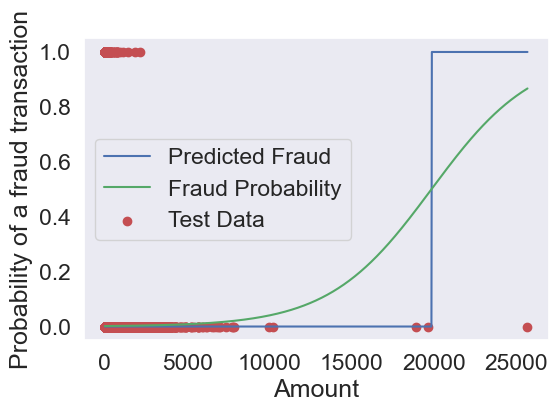

In [63]:
CREDITLR = LogisticRegression(penalty = 'none', max_iter = 10000)

### We need to pass n*2 array, so reshape is needed 
creditlr = CREDITLR.fit(Xtrain.Amount.values.reshape(-1,1), ytrain)

print(f"Intercept: {creditlr.intercept_}\nCoefficient: {creditlr.coef_}")


#####-----plot

fig, ax = plt.subplots(dpi = 100)

plt.scatter(Xtest.Amount, ytest, color = 'r',label='Test Data')


## define an Xrange array to make more data points on the x
Xrange = np.linspace(0, max(Xtest.Amount), 1000)

Pred = creditlr.predict(Xrange.reshape(-1,1))

plt.plot(Xrange, Pred, color = 'b',label='Predicted Fraud')


PredProb = creditlr.predict_proba(Xrange.reshape(-1,1))

plt.plot(Xrange, PredProb[:,1], color = 'g',label='Fraud Probability')
plt.grid()
plt.legend()
plt.xlabel('Amount')
plt.ylabel('Probability of a fraud transaction')


In [64]:
### Train-test split for training and making predictions
train, test = train_test_split(credit, test_size = 0.2, random_state = 0) 
Xtrain = train.drop('Class', axis='columns')
ytrain = train.Class
Xtest = test.drop('Class', axis='columns')
ytest = test.Class

### Instruction:
Compute the label-based criteria for your amount-only classifier using the **test data**. Use a threshold of 0.5. 

In [65]:
def compute_performance(yhat, y, classes, y_proba):

#     tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
#     tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
#     fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
#     fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

#     print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy "fraction of true predictions wrt all the predictions"
#     acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision "Of the ones I labeled +, how many are actually +?"
#     precision = tp / (tp + fp)
    
    # Recall "Of all the + in the data, how many do I correctly label?"
#     recall = tp / (tp + fn)    
    
    # Sensitivity "Of all the + in the data, how many do I correctly label?"
#     sensitivity = recall
    
    # Specificity "Of all the - in the data, how many do I correctly label?"
#     specificity = tn / (fp + tn)
       

    roc_auc = roc_auc_score(y_true = y, y_score = y_proba[:,1])   
    
    precision, recall, thresholds = precision_recall_curve(y_true = y,
                                                           probas_pred = y_proba[:,1],
                                                           pos_label = 1)
    auc_precision_recall = auc(recall, precision)

#     print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
#           "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))
    
    print("roc_auc:",round(roc_auc,4),"pr_auc:",round(auc_precision_recall,4))

## Evaluate predictions

In [7]:
def ConfMatrix_Plot(ytrain_true, ytrain_pred, label, ytest_true, ytest_pred):

    fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
    ax1, ax2 = axes
    plt.subplots_adjust(wspace=0.45)

    ####---------- train data
    Conf_matrix_train = confusion_matrix(y_true = ytrain_true ,
                                         y_pred = ytrain_pred)

    df_cm = pd.DataFrame(Conf_matrix_train,
                         index = ['No Fraud', 'Fraud'],
                         columns = ['No Fraud', 'Fraud'])

    sns.set(font_scale=1.5)
    sns.heatmap(df_cm, annot = True, fmt = 'd', ax=ax1, cmap=plt.cm.Blues, alpha=0.8)

    ax1.yaxis.set_ticklabels(ax1.yaxis.get_ticklabels(), rotation = 45, 
                                ha = 'right', fontsize=18)
    ax1.xaxis.set_ticklabels(ax1.xaxis.get_ticklabels(), rotation = 45, 
                                ha = 'right', fontsize=18)

    ax1.set_ylabel('True label', fontsize=25)
    ax1.set_xlabel('Predicted label', fontsize=25)
    ax1.set_title('Train, '+label, fontsize=25)

    #####---------------- test data
    Conf_matrix_test = confusion_matrix(y_true = ytest_true,
                                         y_pred = ytest_pred)

    df_cm = pd.DataFrame(Conf_matrix_test,
                         index = ['No Fraud', 'Fraud'],
                         columns = ['No Fraud', 'Fraud'])

    sns.heatmap(df_cm, annot = True, fmt = 'd', ax=ax2, cmap=plt.cm.Blues, alpha=0.8)

    ax2.yaxis.set_ticklabels(ax2.yaxis.get_ticklabels(), rotation = 45, 
                                ha = 'right', fontsize=18)
    ax2.xaxis.set_ticklabels(ax2.xaxis.get_ticklabels(), rotation = 45, 
                                ha = 'right', fontsize=18)

    ax2.set_ylabel('True label', fontsize=25)
    ax2.set_xlabel('Predicted label', fontsize=25)
    ax2.set_title('Test, '+ label, fontsize=25)
    
    plt.show()


For train data and Amount-only:
roc_auc: 0.4551 pr_auc: 0.002

For test data and Amount-only:
roc_auc: 0.3915 pr_auc: 0.0019


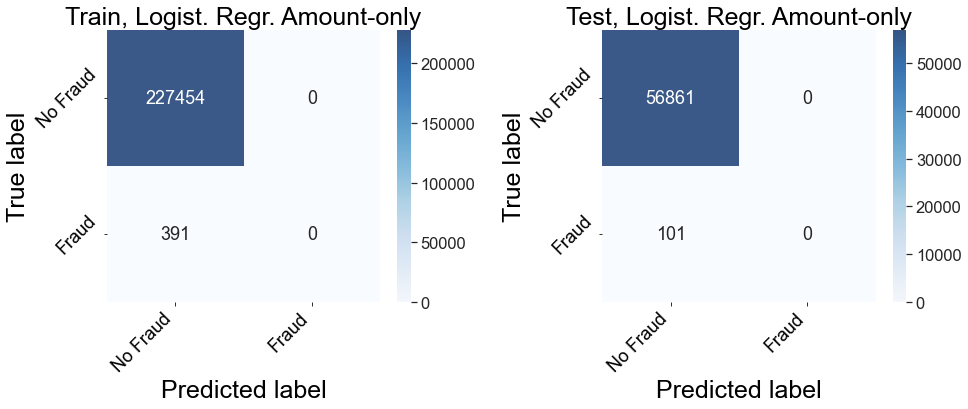

In [8]:
## As the default threshold is 0.5 the following code doesnot change the result 
## ytest_prob = creditlr.predict_proba(Xtest.Amount.values.reshape(-1,1))
## ytest_hat = (ytest_prob[:,1] > 0.5).astype(int)

ytrain_hat = creditlr.predict(Xtrain.Amount.values.reshape(-1,1))
ytrain_proba = creditlr.predict_proba(Xtrain.Amount.values.reshape(-1,1))

print('\nFor train data and Amount-only:')
compute_performance(ytrain_hat, ytrain, creditlr.classes_, ytrain_proba)

####----------------------------- Test Data

ytest_hat = creditlr.predict(Xtest.Amount.values.reshape(-1,1))
ytest_proba = creditlr.predict_proba(Xtest.Amount.values.reshape(-1,1))

print('\nFor test data and Amount-only:')
compute_performance(ytest_hat, ytest, creditlr.classes_, ytest_proba)

###--------- plot
ConfMatrix_Plot(ytrain_true = ytrain,
                ytrain_pred = ytrain_hat,
                label = 'Logist. Regr. Amount-only',
                ytest_true = ytest,
                ytest_pred = ytest_hat
               )

### Answer the question:

Is this classifier useful for finding fraudulent transactions? 

**answer:** The accuracy of this classification is 99.8 which is the same as baseline, it seems that we don't learn more with this classification than just guesing not fraud for all the cases, whereas we know they are 492 fraud cases amonge 284315 transaction 

### Instructions: 
Now fit a logistic regression model to the training data and include all the variables in the data frame (except for `Class`).

In [10]:
creditlr_t = CREDITLR.fit(Xtrain, ytrain)
print(f"Intercept: {creditlr_t.intercept_}\nCoefficients:\n {creditlr.coef_}")


Intercept: [-3.30306105]
Coefficients:
 [[-5.76708001e-05  4.01539298e-01 -4.52404496e-01 -1.16266549e+00
   1.70772407e-01 -1.47775672e-01 -7.70855549e-02  8.98140772e-01
  -4.70596454e-01 -5.84567595e-01 -4.11120819e-01 -5.91789441e-01
   1.56604742e-01 -4.83322064e-01 -7.50595552e-01 -9.03232459e-01
  -3.67535800e-01 -5.24926058e-01  1.20773195e-01 -2.20307043e-02
   2.10687329e-01  6.14033766e-01  6.57237159e-01  7.88492527e-02
  -3.03967175e-02 -8.28466429e-01  1.54426962e-01 -1.33444993e-01
   7.86695132e-02 -6.25098787e-03]]


### Answer the question:
* According to this more complex model, are larger or smaller Amounts more strongly associated with fraud, if all other variables are held equal?

**answer:** Previusly the Amount had the coefficient 0.00032136 in the equation and now its coeficient is -0.005402. As `Features with positive coefficients increase the probability of the modeled outcome as they increase, while features with negative coefficients decrease the probability as they increase.` in more complex model, unlike the first model, higher values of Amount are less associated with fraud.

### Instruction:

Compute the label-based criteria for new classifier using the test data. Use a threshold of 0.5. 


For training data, Logist. Regr. All-variables:
roc_auc: 0.9392 pr_auc: 0.6521

For test data, Logist. Regr. All-variables:
roc_auc: 0.9604 pr_auc: 0.6555


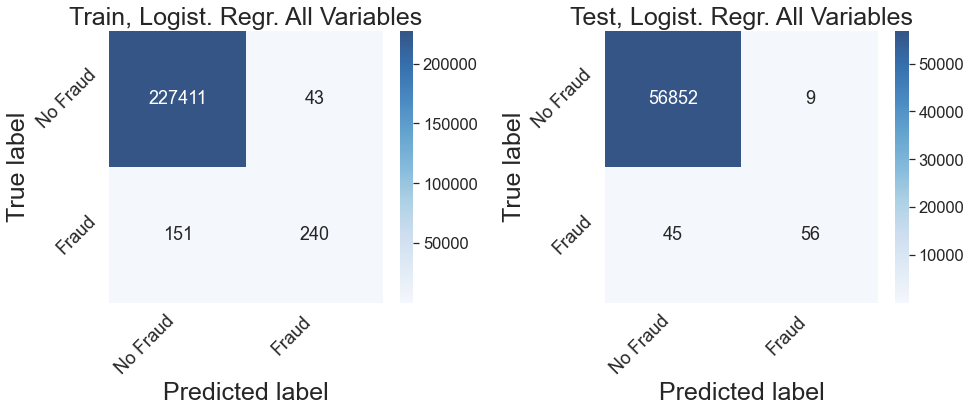

In [11]:
ytrain_hat = creditlr_t.predict(Xtrain)
ytrain_proba = creditlr_t.predict_proba(Xtrain)

print('For training data, Logist. Regr. All-variables:')
compute_performance(ytrain_hat, ytrain, creditlr_t.classes_, ytrain_proba)


ytest_hat = creditlr_t.predict(Xtest)
ytest_proba = creditlr_t.predict_proba(Xtest)

print('\nFor test data, Logist. Regr. All-variables:')
compute_performance(ytest_hat, ytest, creditlr_t.classes_, ytest_proba)


###--------- plot
ConfMatrix_Plot(ytrain_true = ytrain,
                ytrain_pred = ytrain_hat,
                label = 'Logist. Regr. All Variables',
                ytest_true = ytest,
                ytest_pred = ytest_hat
               )

### Answer the question:

* Is this classifier **better or worse than the amount-only classifier** for finding fraudulent transactions? Explain in one or two sentences.*

**answer:** 
Increasing the number of tp and fp infers that the smaller amounts are associated to fraud. Increasing precision from 0 to 0.845 shows not only number of positive labels increased, but this labeling improved the prediction results.

### Instructions:

Plot ROC curves and precision-recall curves for both of your classifiers, Then answer the following questions.

/Users/razbeh/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/razbeh/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


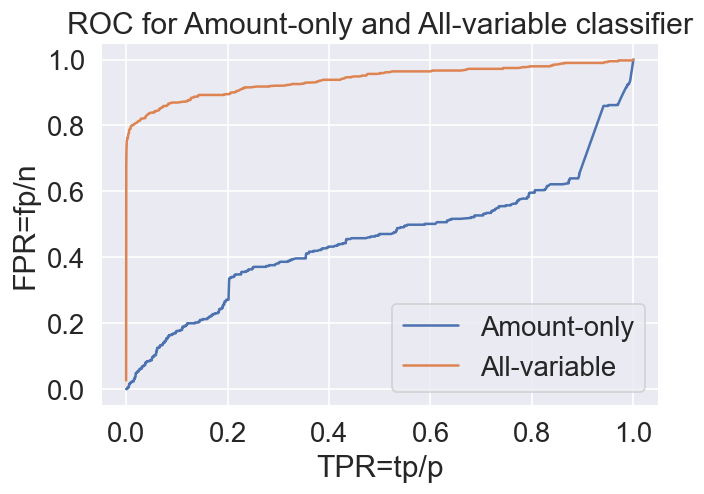

The area beneath the ROC curve for Amount-only is:  0.4550712055389429
The area beneath the ROC curve for All-variables is: 0.9392115304076436


In [10]:
# ROC for Amount-only classifier
creditlr = CREDITLR.fit(Xtrain.Amount.values.reshape(-1,1), ytrain)

ytrain_prob = creditlr.predict_proba(Xtrain.Amount.values.reshape(-1,1))

fpr, tpr , _ = roc_curve(y_true = ytrain,
                         y_score = ytrain_prob[:,1],
                         pos_label = 1   # label of the positive class
                        )

fig, ax = plt.subplots(dpi = 120)

ax = sns.lineplot(fpr, tpr, label='Amount-only')

#####--------------- all-variable classifier
creditlr_t = CREDITLR.fit(Xtrain, ytrain)

ytrain_prob_t = creditlr_t.predict_proba(Xtrain)

fpr_t, tpr_t , _ = roc_curve(ytrain,
                             ytrain_prob_t[:,1],
                             pos_label = 1)

ax = sns.lineplot(fpr_t, tpr_t, label='All-variable')

#####---------------
plt.xlabel('TPR=tp/p')
plt.ylabel('FPR=fp/n')
plt.title('ROC for Amount-only and All-variable classifier')
plt.legend()
plt.show()
print('The area beneath the ROC curve for Amount-only is: ',auc(fpr, tpr))
print('The area beneath the ROC curve for All-variables is:',auc(fpr_t, tpr_t))

/Users/razbeh/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/razbeh/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


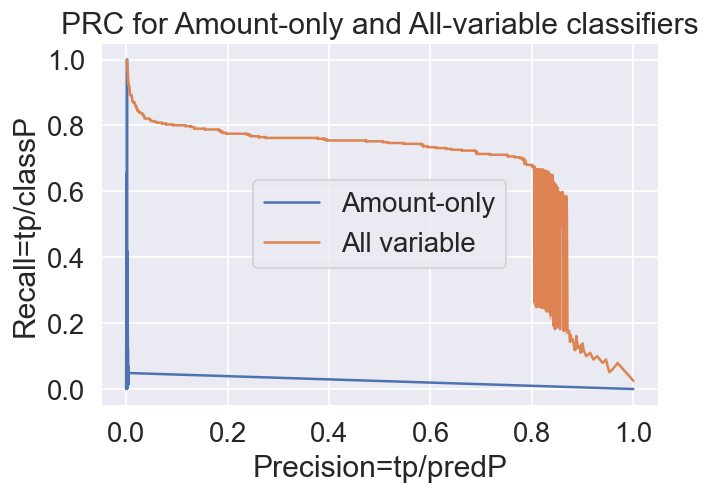

In [11]:
# PRC for Amount-only and All-variable classifiers

fig, ax = plt.subplots(dpi = 120)

precision, recall , threshold = precision_recall_curve(ytrain, ytrain_prob[:,1],\
                                                       pos_label = 1)

ax = sns.lineplot(precision, recall, label='Amount-only')

###-----
precision_t, recall_t , threshold_t = precision_recall_curve(ytrain, ytrain_prob_t[:,1],\
                                                       pos_label = 1)

ax = sns.lineplot(precision_t, recall_t, label='All variable')

plt.title('PRC for Amount-only and All-variable classifiers')
plt.xlabel('Precision=tp/predP')
plt.ylabel('Recall=tp/classP')
plt.legend()
plt.show()

### Answer the questions:
1- Which classifier has a higher estimated probability of correctly distinguishing between a positive and a negative instance? How do you know?

**answer:** all-variable classifier has a higher estimate probability bacause has higher AUROC 

2- How could you explain a result where a logistic regression classifier produces an AUROC that is "worse than random", i.e. less than 0.5, even on its training set?

**answer:** If we plot line with 45 degrees slope, at some points the Amount-only classifier falls beneath the line. and its area is less than 0.5

3- Which classifier is preferable if we want to recover at least 60% of fraudulent transactions?

**answer:** all-variable classifier has higher recall (0.75) compare to Amount-only classifier with recall (0.02), thus the all-variable classifier is preferred. 

## Let's try Decision tree classifieres

In [13]:
# train, test = train_test_split(DF, test_size = 0.2, random_state = 54321)

dt = DecisionTreeClassifier(random_state=54321, max_depth=3)

dt_model = dt.fit(Xtrain, ytrain)

For training data, Decision Tree:
roc_auc: 0.9141 pr_auc: 0.8253

For test data, Decision Tree:
roc_auc: 0.9255 pr_auc: 0.7954


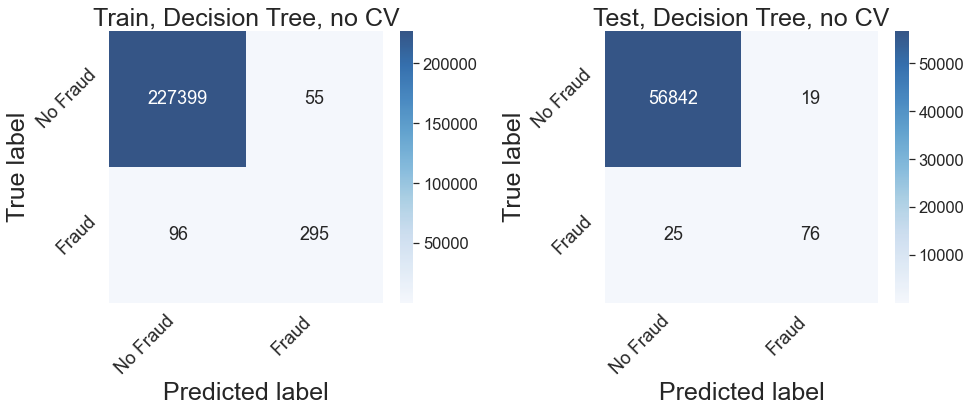

In [15]:
train_pred = dt_model.predict(Xtrain)
train_probs = dt_model.predict_proba(Xtrain)


print('For training data, Decision Tree:')
compute_performance(train_pred, ytrain, dt_model.classes_, train_probs)


####------

test_pred = dt_model.predict(Xtest)
test_probs = dt_model.predict_proba(Xtest)

print('\nFor test data, Decision Tree:')
compute_performance(test_pred, ytest, dt_model.classes_, test_probs)

###--------- plot
ConfMatrix_Plot(ytrain_true = ytrain,
                ytrain_pred = train_pred,
                label = 'Decision Tree, no CV',
                ytest_true = ytest,
                ytest_pred = test_pred
               )

## Employ Cross Validation on Decision tree model

In [17]:
param_grid = dict({'max_depth': [5,10, 15]
                  })

cv_model = GridSearchCV(dt,        # Original model 
                       param_grid,          # Parameter grid
                       cv = 3,              # Number of cross-validation folds.  
                       scoring = 'roc_auc',#'average_precision', # How to rank outputs.
                       n_jobs = -1,         # Parallel jobs. -1 is "all you have"
                       refit = False,       # If refit at the end with the best. We'll do it manually.
                       verbose = 1          # If to show what it is doing.
                      )

cv_model.fit(Xtrain, ytrain)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=54321),
             n_jobs=-1, param_grid={'max_depth': [5, 10, 15]}, refit=False,
             scoring='roc_auc', verbose=1)

In [18]:
dt = DecisionTreeClassifier(random_state=54321,
                            max_depth=cv_model.best_params_.get('max_depth'))

cv_dt_model = dt.fit(Xtrain, ytrain)

For training data, CV Decision Tree:
roc_auc: 0.9508 pr_auc: 0.8521

For test data, CV Decision Tree:
roc_auc: 0.9218 pr_auc: 0.7371


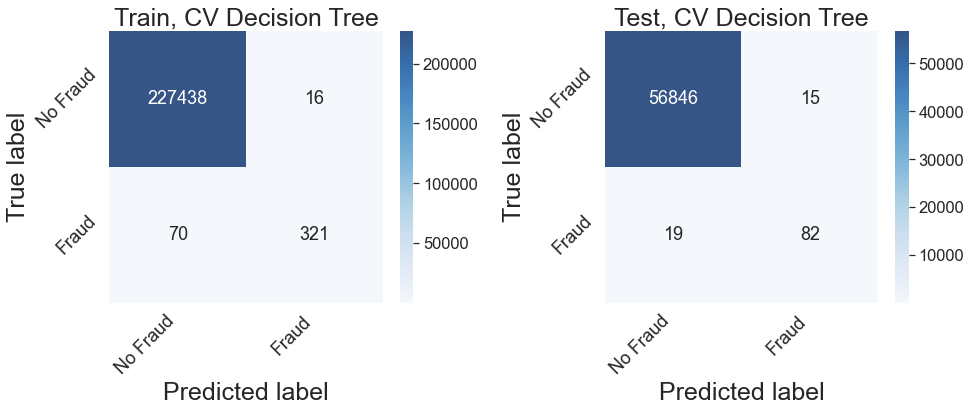

In [19]:
train_pred = cv_dt_model.predict(Xtrain)
probs = cv_dt_model.predict_proba(Xtrain)

print('For training data, CV Decision Tree:')
compute_performance(train_pred, ytrain, cv_dt_model.classes_, probs)


#####---------------- test data
test_pred = cv_dt_model.predict(Xtest)
probs = cv_dt_model.predict_proba(Xtest)

print('\nFor test data, CV Decision Tree:')
compute_performance(test_pred, ytest, cv_dt_model.classes_, probs)

###--------- plot
ConfMatrix_Plot(ytrain_true = ytrain,
                ytrain_pred = train_pred,
                label = 'CV Decision Tree',
                ytest_true = ytest,
                ytest_pred = test_pred
               )

## Balanced Dataset

In [49]:
dfn = train[train['Class'] == 0]    ## data with no fraud
dfy = train[train['Class'] == 1]    ## data with fraud

Ntrain = train.shape[0]
fraud_train = dfy.shape[0]
fraud_frac = fraud_train / Ntrain

dfn_balanced = dfn.sample(frac = 1*fraud_frac, replace = False, random_state = 92285)

train_balanced = pd.concat([dfy, dfn_balanced])

# Print out metrics
print("Total count: %s, Fraud cases count: %s, Proportion of fraud cases: %s" %\
      (Ntrain, fraud_train, fraud_frac))
print("Balanced training dataset count: %s" % train_balanced.shape[0])

Total count: 227845, Fraud cases count: 391, Proportion of fraud cases: 0.0017160789132963199
Balanced training dataset count: 781


In [50]:
cv_model.fit(train_balanced.drop('Class', axis='columns'), train_balanced.Class)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=54321),
             n_jobs=-1, param_grid={'max_depth': [5, 10, 15]}, refit=False,
             scoring='roc_auc', verbose=1)

In [51]:
dt = DecisionTreeClassifier(random_state=54321,
                            max_depth=cv_model.best_params_.get('max_depth'))

cv_dt_model_b = dt.fit(train_balanced.drop('Class', axis='columns'), train_balanced.Class)


For training, balanced data_ CV DT:
roc_auc: 0.9959 pr_auc: 0.9977

For test, balanced data_ CV DT:
roc_auc: 0.9159 pr_auc: 0.4709


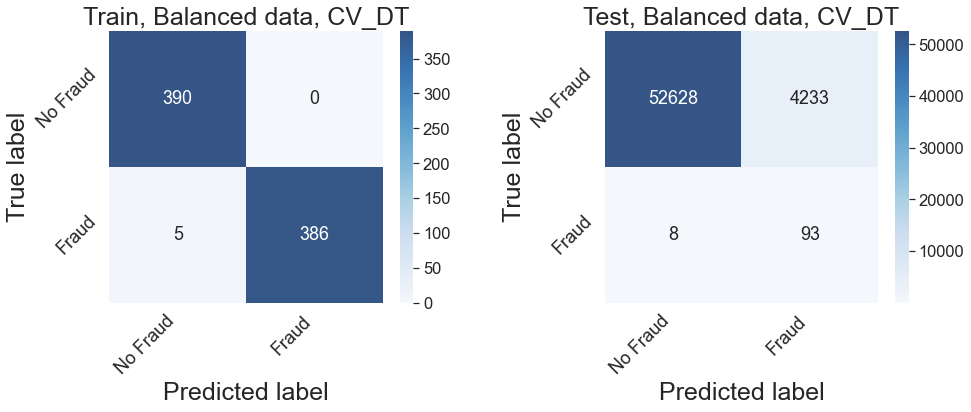

In [52]:
train_pred = cv_dt_model_b.predict(train_balanced.drop('Class', axis='columns'))
probs = cv_dt_model_b.predict_proba(train_balanced.drop('Class', axis='columns'))


print('\nFor training, balanced data_ CV DT:')
compute_performance(train_pred, train_balanced.Class, cv_dt_model_b.classes_, probs)



test_pred = cv_dt_model_b.predict(test.drop('Class', axis='columns'))
probs = cv_dt_model_b.predict_proba(test.drop('Class', axis='columns'))

print('\nFor test, balanced data_ CV DT:')
compute_performance(test_pred, test.Class, cv_dt_model_b.classes_, probs)


ConfMatrix_Plot(train_balanced.Class, train_pred, 'Balanced data, CV_DT', ytest, test_pred)

In [56]:
def fraction(n):
    dfn_balanced = dfn.sample(frac = n*fraud_frac, replace = False, random_state = 92285)

    train_balanced = pd.concat([dfy, dfn_balanced])

    cv_model.fit(train_balanced.drop('Class', axis='columns'), train_balanced.Class)

    dt = DecisionTreeClassifier(random_state=54321,
                                max_depth=cv_model.best_params_.get('max_depth'))

    cv_dt_model_b = dt.fit(train_balanced.drop('Class', axis='columns'), train_balanced.Class)
    
    train_pred = cv_dt_model_b.predict(train_balanced.drop('Class', axis='columns'))
    probs = cv_dt_model_b.predict_proba(train_balanced.drop('Class', axis='columns'))

    print('\nFor training, balanced data_ CV DT:')
    compute_performance(train_pred, train_balanced.Class, cv_dt_model_b.classes_, probs)

    test_pred = cv_dt_model_b.predict(test.drop('Class', axis='columns'))
    probs = cv_dt_model_b.predict_proba(test.drop('Class', axis='columns'))

    print('\nFor test, balanced data_ CV DT:')
    compute_performance(test_pred, test.Class, cv_dt_model_b.classes_, probs)
    
    print('*************************************************')

In [59]:
for i in range(1,11):
    print('\nN_training = %s * N_test' % i)
    fraction(i)


N_training = 1 * N_test
Fitting 3 folds for each of 3 candidates, totalling 9 fits

For training, balanced data_ CV DT:
roc_auc: 0.9959 pr_auc: 0.9977

For test, balanced data_ CV DT:
roc_auc: 0.9159 pr_auc: 0.4709
*************************************************

N_training = 2 * N_test
Fitting 3 folds for each of 3 candidates, totalling 9 fits

For training, balanced data_ CV DT:
roc_auc: 0.9816 pr_auc: 0.9849

For test, balanced data_ CV DT:
roc_auc: 0.929 pr_auc: 0.4635
*************************************************

N_training = 3 * N_test
Fitting 3 folds for each of 3 candidates, totalling 9 fits

For training, balanced data_ CV DT:
roc_auc: 0.9737 pr_auc: 0.9732

For test, balanced data_ CV DT:
roc_auc: 0.9509 pr_auc: 0.6697
*************************************************

N_training = 4 * N_test
Fitting 3 folds for each of 3 candidates, totalling 9 fits

For training, balanced data_ CV DT:
roc_auc: 0.963 pr_auc: 0.9629

For test, balanced data_ CV DT:
roc_auc: 0.9392 pr_